In [ ]:
# Connect to Hopsworks
import hopsworks
import pandas as pd

import os
import sys

API_KEY = os.getenv("HOPSWORKS_API_KEY")


HOPSWORKS_HOST = "eu-west.cloud.hopsworks.ai"
PROJECT_NAME = "Islamabad_Aqi_Predictor"

project = hopsworks.login(
    host=HOPSWORKS_HOST,
    api_key_value=API_KEY,
    project=PROJECT_NAME
)
fs = project.get_feature_store()

# Read raw AQI features
fg_raw = fs.get_feature_group(name="islamabad_hourly_aqi", version=1)
df_raw = fg_raw.read()
print(df_raw.head())


2026-02-02 21:12:36,864 INFO: Closing external client and cleaning up certificates.
2026-02-02 21:12:36,870 INFO: Connection closed.
2026-02-02 21:12:36,872 INFO: Initializing external client
2026-02-02 21:12:36,872 INFO: Base URL: https://eu-west.cloud.hopsworks.ai:443
2026-02-02 21:12:43,305 INFO: Python Engine initialized.

Logged in to project, explore it here https://eu-west.cloud.hopsworks.ai:443/p/5246
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (15.91s) 
   pm2_5  pm10  carbon_monoxide  nitrogen_dioxide  ozone  sulphur_dioxide  \
0   17.6  19.7            538.0              13.4  127.0             15.4   
1   33.6  35.4           1362.0              16.1  150.0             50.9   
2   21.9  22.5            158.0              34.8   43.0              2.5   
3   23.9  25.5            635.0              25.8   88.0              8.7   
4   46.4  49.0           1908.0              45.5   25.0              8.2   

                  timestamp  hour  da

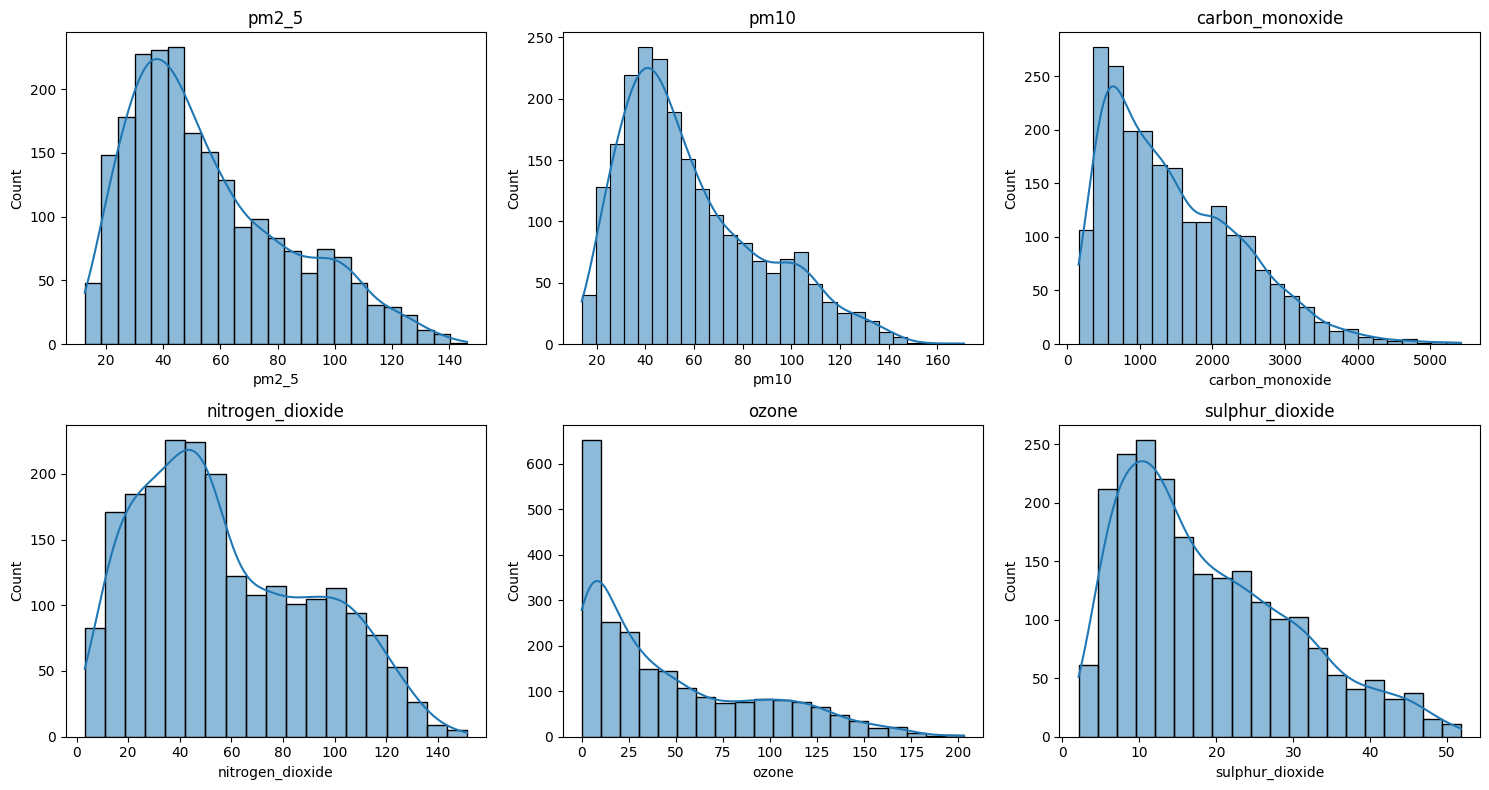

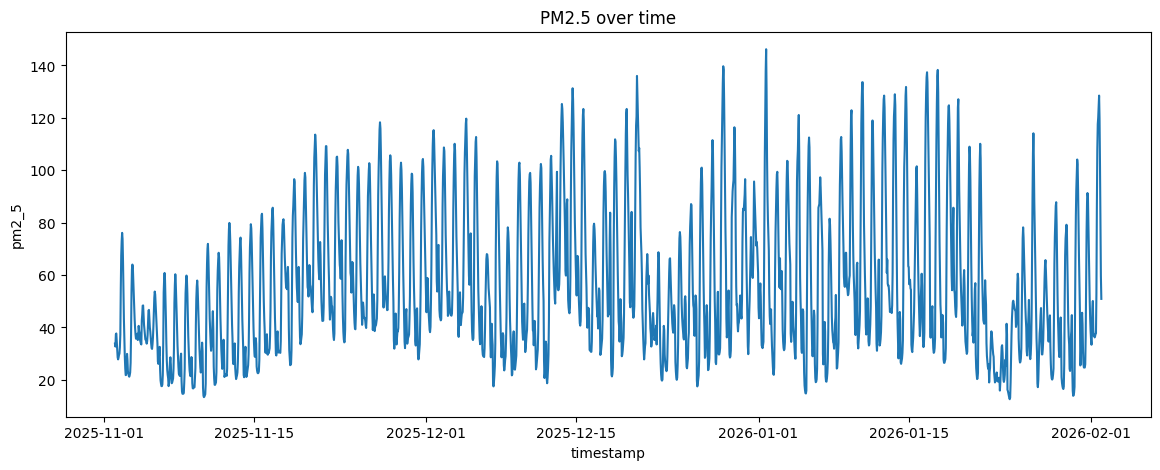

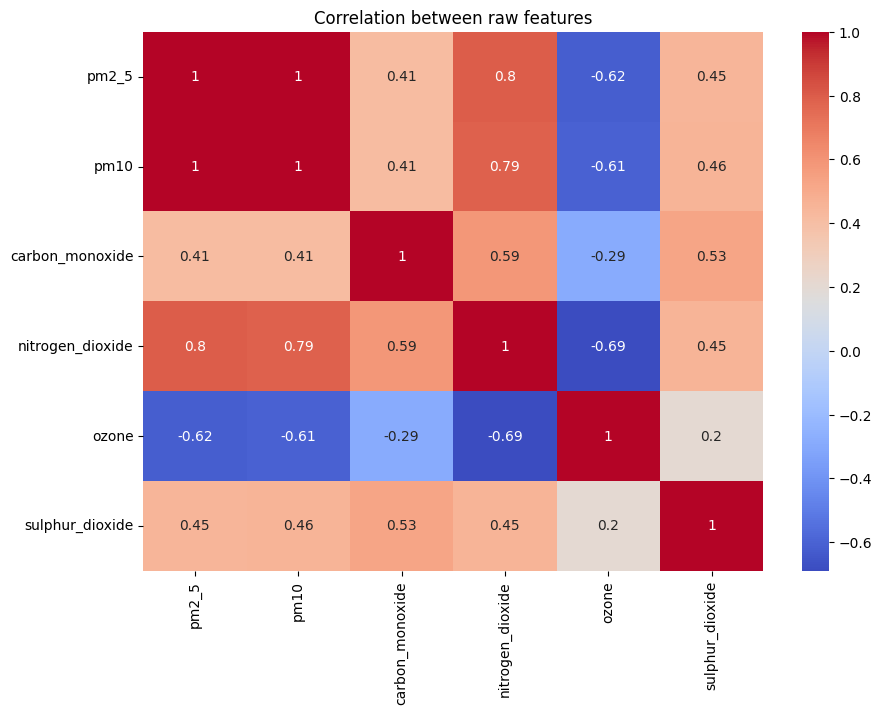

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert timestamp to datetime
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'], unit='us')

# 1️⃣ Plot distributions
numeric_cols = ['pm2_5', 'pm10', 'carbon_monoxide', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide']

plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df_raw[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# 2️⃣ Time trends
plt.figure(figsize=(14,5))
sns.lineplot(x='timestamp', y='pm2_5', data=df_raw)
plt.title("PM2.5 over time")
plt.show()

# 3️⃣ Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_raw[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between raw features")
plt.show()


In [1]:
#Engineered feature
import hopsworks
import pandas as pd

API_KEY = "ei9u8aovI3aMH0sh.6ZFcu8exBZcQxTpYyPpzTpvxeXvg1vlBoaQGQdPNkzft6FfEJgNX1B0irPnxYVve"
HOPSWORKS_HOST = "eu-west.cloud.hopsworks.ai"

project = hopsworks.login(api_key_value=API_KEY, host=HOPSWORKS_HOST)
fs = project.get_feature_store()

fg_engineered = fs.get_feature_group(name="islamabad_hourly_aqi_engineered", version=1)
df = fg_engineered.read()
print(df.head())


2026-02-02 22:04:57,385 INFO: Initializing external client
2026-02-02 22:04:57,386 INFO: Base URL: https://eu-west.cloud.hopsworks.ai:443
2026-02-02 22:04:59,898 INFO: Python Engine initialized.

Logged in to project, explore it here https://eu-west.cloud.hopsworks.ai:443/p/5246
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (13.39s) 
   pm2_5   pm10  carbon_monoxide  nitrogen_dioxide  ozone  sulphur_dioxide  \
0   28.6   29.5           1099.0              34.4   47.0              4.1   
1  107.6  112.2           2512.0             117.8    0.0             38.9   
2   43.1   44.9           3414.0              86.1   53.0             28.1   
3   72.6   73.1           3269.0              60.5   10.0             15.7   
4  133.2  137.8           3193.0             102.4    0.0             48.4   

                  timestamp  hour  day  month  pm2_5_change  pm10_change  \
0 2025-11-06 02:00:00+00:00     2    6     11         -15.8        -15.8   
1 2026-01-04

In [2]:
# Summary statistics
print(df.describe())

# Check missing values
print(df.isnull().sum())


             pm2_5         pm10  carbon_monoxide  nitrogen_dioxide  \
count  2208.000000  2208.000000      2208.000000       2208.000000   
mean     56.041893    58.776857      1453.514040         57.724411   
std      27.914631    28.653888       918.482596         33.392831   
min      12.600000    13.900000       158.000000          3.200000   
25%      34.575000    37.300000       697.750000         30.900000   
50%      48.500000    51.000000      1249.000000         50.700000   
75%      73.800000    76.400000      2050.500000         83.900000   
max     146.200000   170.900000      5420.000000        151.200000   

             ozone  sulphur_dioxide         hour          day        month  \
count  2208.000000      2208.000000  2208.000000  2208.000000  2208.000000   
mean     46.099638        18.885100    11.500000    15.836957     7.869565   
std      45.671450        11.103914     6.923755     8.856232     5.012465   
min       0.000000         2.100000     0.000000     1.00

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


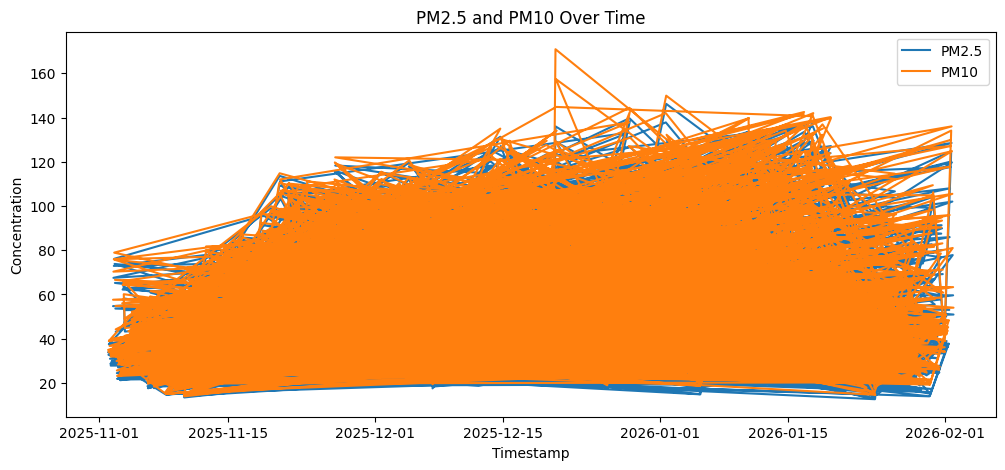

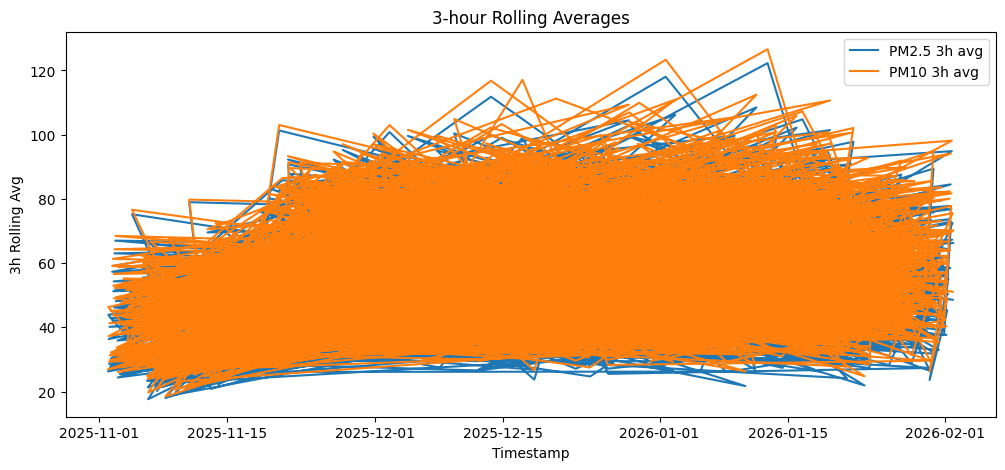

In [5]:
# Convert timestamp if not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot hourly trends of PM2.5 and PM10
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['pm2_5'], label='PM2.5')
plt.plot(df['timestamp'], df['pm10'], label='PM10')
plt.xlabel('Timestamp')
plt.ylabel('Concentration')
plt.title('PM2.5 and PM10 Over Time')
plt.legend()
plt.show()

# Plot rolling averages
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['pm2_5_3h_avg'], label='PM2.5 3h avg')
plt.plot(df['timestamp'], df['pm10_3h_avg'], label='PM10 3h avg')
plt.xlabel('Timestamp')
plt.ylabel('3h Rolling Avg')
plt.title('3-hour Rolling Averages')
plt.legend()
plt.show()


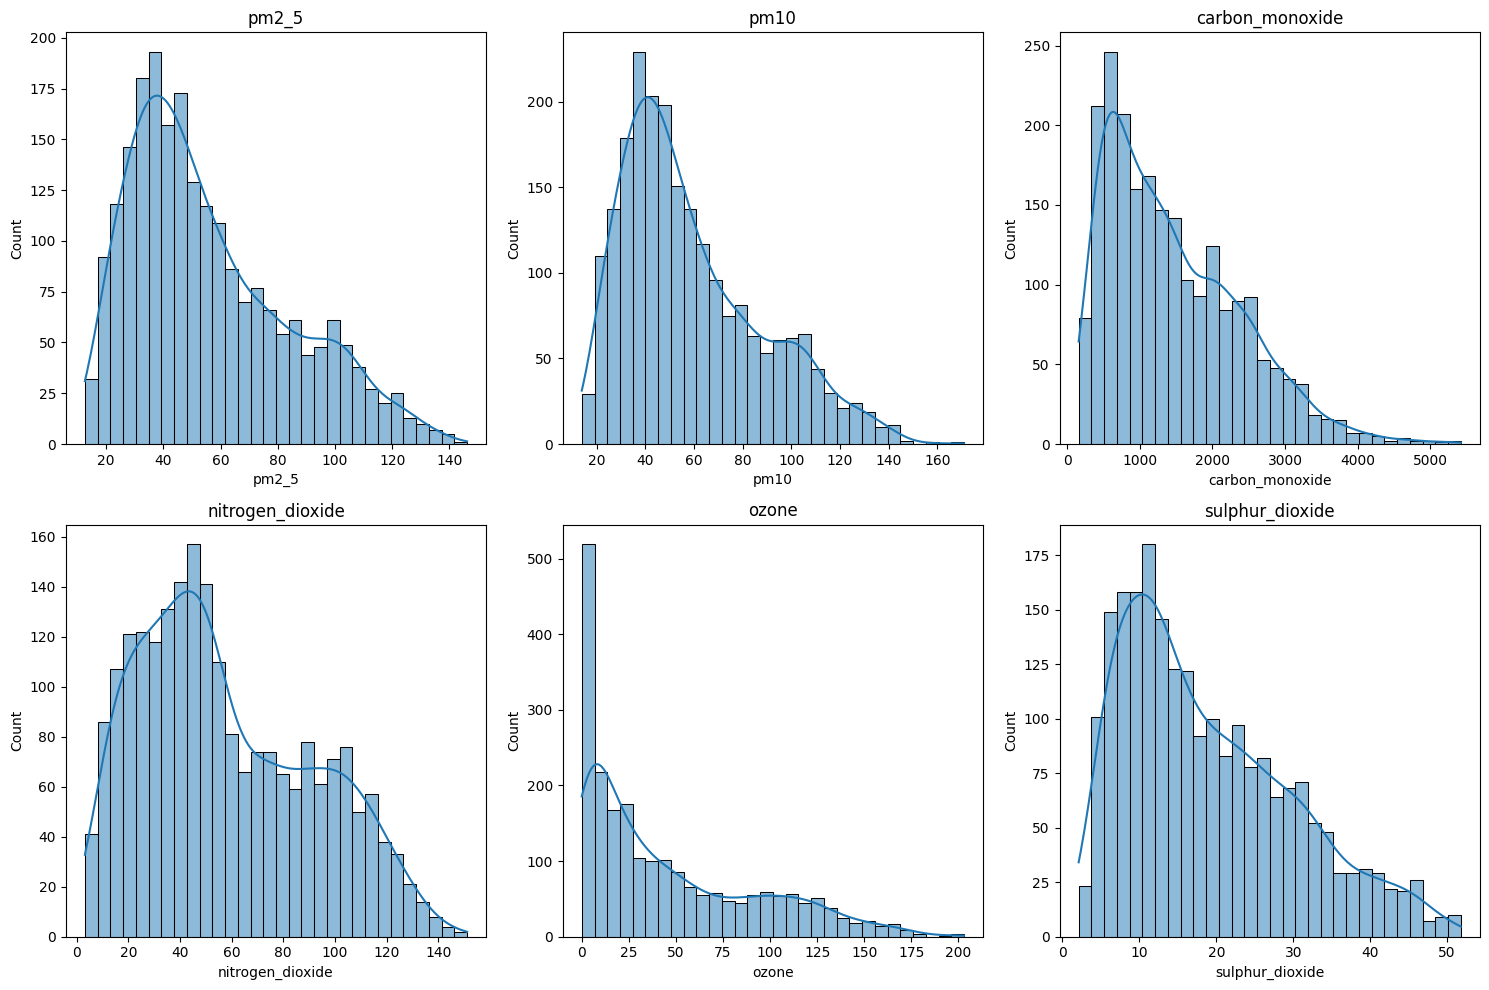

In [7]:
# Pollutant distributions
pollutants = ['pm2_5', 'pm10', 'carbon_monoxide', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide']
plt.figure(figsize=(15,10))
for i, col in enumerate(pollutants, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


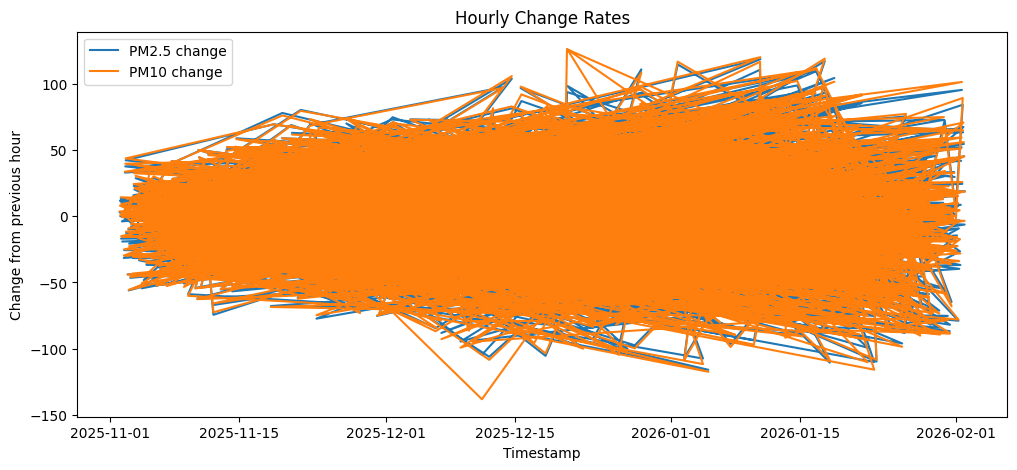

In [8]:
# Visualize hourly change
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['pm2_5_change'], label='PM2.5 change')
plt.plot(df['timestamp'], df['pm10_change'], label='PM10 change')
plt.xlabel('Timestamp')
plt.ylabel('Change from previous hour')
plt.title('Hourly Change Rates')
plt.legend()
plt.show()


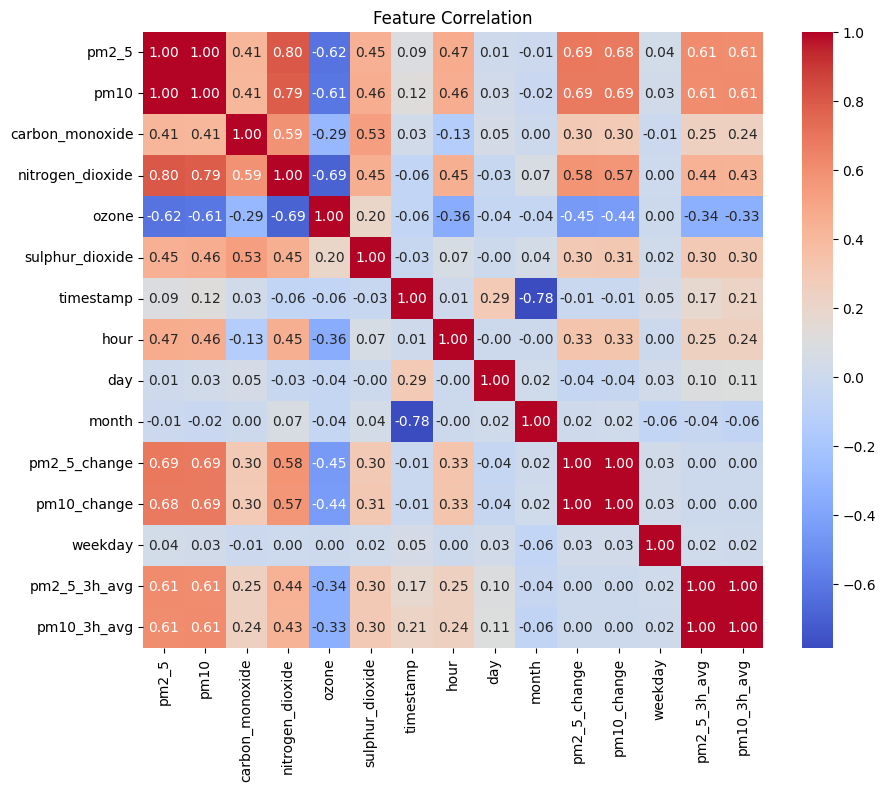

In [9]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


2026-02-02 22:09:08,567 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-02 22:09:08,575 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


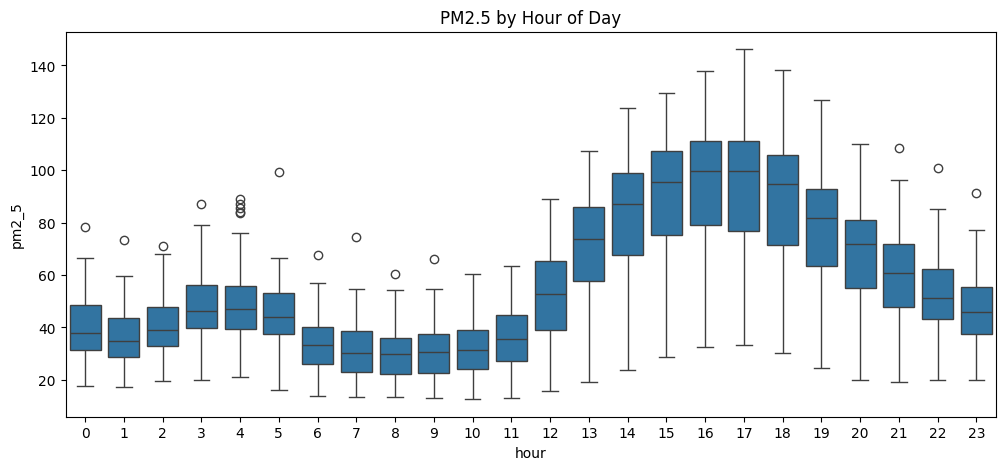

2026-02-02 22:09:09,074 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-02 22:09:09,086 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


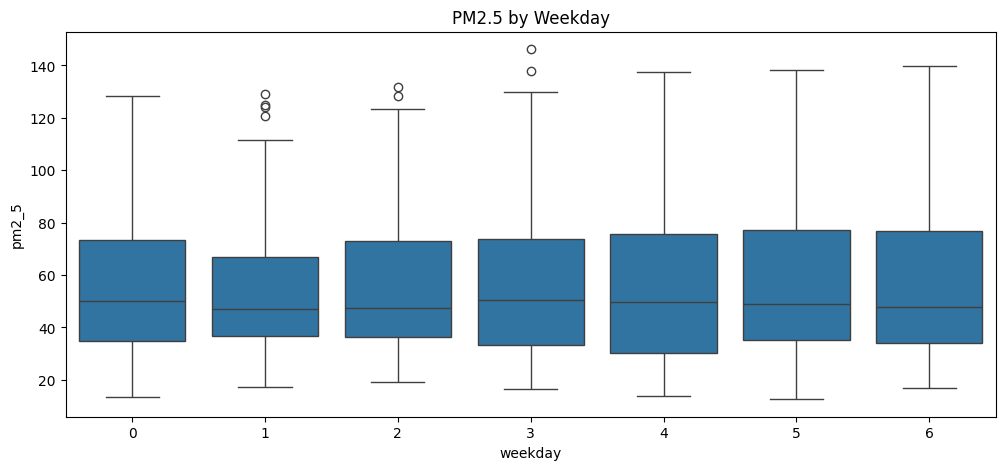

In [10]:
# Boxplot of PM2.5 by hour of day
plt.figure(figsize=(12,5))
sns.boxplot(x='hour', y='pm2_5', data=df)
plt.title('PM2.5 by Hour of Day')
plt.show()

# Boxplot of PM2.5 by day of week
plt.figure(figsize=(12,5))
sns.boxplot(x='weekday', y='pm2_5', data=df)
plt.title('PM2.5 by Weekday')
plt.show()
